* 데이터셋 : https://archive.ics.uci.edu/ml/datasets/Online+Retail#
## 라이브러리 로드

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt

## 폰트 설정

In [2]:
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        # Linux(Colab)
        !apt-get install fonts-nanum -qq  > /dev/null
        !fc-cache -fv

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont
        
        font_family = "NanumBarunGothic"
    return font_family

plt.rc("font", family=get_font_family())
plt.rc("axes", unicode_minus=False)

<img src="https://pandas.pydata.org/docs/_images/02_io_readwrite.svg">

In [3]:
# pd.read_excel 로 데이터를 불러옵니다.
# 데이터의 용량이 커서 로드하는데 1분 이상 걸릴 수도 있습니다. 또 read_excel은 시간이 오래 걸립니다.
# csv로 로드하는 것이 훨씬 빠릅니다.
# df = pd.read_excel("http://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx")
# df = pd.read_excel("data/Online Retail.xlsx")
df = pd.read_csv("data/online_retail.csv")
df.shape

(541909, 8)

## 데이터 미리보기 및 요약

In [4]:
# 데이터 프레임에서 가장 앞에 있는 5개의 행(기본값)을 출력합니다.
df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
# 데이터 프레임에서 가장 끝에 있는 5개의 행(기본값)을 출력합니다.
df.tail(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [6]:
# 데이터 집합과 각 열들의 자료형을 확인합니다.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


Attribute Information:

- InvoiceNo: 송장번호. 해당 거래에 할당된 6자리 정수
  * 이 코드가 문자 'c'로 시작하면 취소를 나타냅니다.
- StockCode: 제품 코드. 각 고유 제품에 고유하게 할당된 5자리 정수
- Description: 제품 이름
- Quantity: 거래당 각 제품의 수량 
  * 이 코드가 ‘-’(마이너스)로 시작하면 취소를 나타냅니다.
- InvoiceDate:  송장 날짜 및 시간. 숫자, 각 거래가 생성된 날짜 및 시간
- UnitPrice: 단가. 숫자, 스털링(영국 화폐) 단위의 제품 가격
- CustomerID: 고객 번호. 해당 고객에게 고유하게 할당된 5자리 정수
- Country: 국가 이름. 해당 고객이 거주하는 국가의 이름

## 기술통계

In [7]:
# describe 를 통해 수치 타입의 기술통계를 구합니다.
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [8]:
# describe 를 통해 object 타입의 기술통계를 구합니다.
df.describe(include="object")

,InvoiceNo,StockCode,Description,InvoiceDate,Country
count,541909,541909,540455,541909,541909
unique,25900,4070,4223,23260,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2011-10-31 14:41:00,United Kingdom
freq,1114,2313,2369,1114,495478


## 결측치

In [9]:
# 결측치 합계를 구합니다.
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [10]:
# 결측치 비율을 구합니다.
df.isnull().mean() * 100

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

<AxesSubplot:>

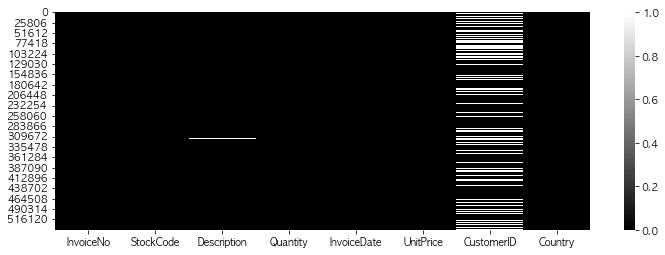

In [11]:
# 결측치를 시각화 합니다.
plt.figure(figsize=(12, 4))
sns.heatmap(df.isnull(), cmap="gray")

## 히스토그램으로 전체 수치변수 시각화

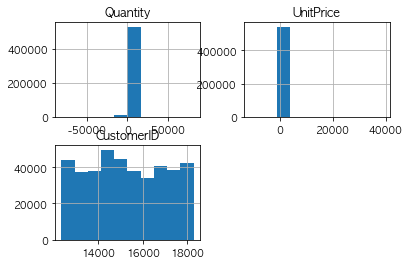

In [12]:
_ = df.hist()

## 전체 주문금액 파생변수 만들기
* 수량 X 금액으로 전체 금액 계산하기

In [13]:
# TotalPrice 는 RFM 중 MonetaryValue의 값이 됩니다.
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


## 회원 vs 비회원 구매

In [14]:
# CustomerID값이 결측치인 값에 대한 Country값을 가져와 빈도수를 구합니다.
df.loc[df["CustomerID"].isnull(), "Country"].value_counts()

United Kingdom    133600
EIRE                 711
Hong Kong            288
Unspecified          202
Switzerland          125
France                66
Israel                47
Portugal              39
Bahrain                2
Name: Country, dtype: int64

In [15]:
# CustomerID값이 결측치가 **아닌** 값에 대한 Country값을 가져와 빈도수를 구합니다.

df.loc[df["CustomerID"].notnull(), "Country"].value_counts()

United Kingdom          361878
Germany                   9495
France                    8491
EIRE                      7485
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               1877
Portugal                  1480
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
USA                        291
Israel                     250
Unspecified                244
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon                     45
Lithuani

## 매출액 상위 국가

In [16]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'TotalPrice'],
      dtype='object')

In [17]:
# 국가별 매출액의 평균과 합계를 구합니다.
# TotalPrice를 통해 매출액 상위 10개만 가져옵니다.
df.groupby("Country")["TotalPrice"].agg(["mean", "sum"]).nlargest(10, "sum").style.format("{:,.0f}")

,mean,sum
Country,,
United Kingdom,17,"8,187,806"
Netherlands,120,"284,662"
EIRE,32,"263,277"
Germany,23,"221,698"
France,23,"197,404"
Australia,109,"137,077"
Switzerland,28,"56,385"
Spain,22,"54,775"
Belgium,20,"40,911"


## 상품
* 판매 빈도가 높은 상품

In [18]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
TotalPrice          0
dtype: int64

In [19]:
# 상품 판매 빈도, 판매 총 수량, 총 매출액 
# 판매 빈도가 높은 상품 상위 10개
stock_sale = df.groupby(["StockCode"]).agg({"InvoiceNo": "count", 
                               "Quantity": "sum",
                               "TotalPrice": "sum"
                              }).nlargest(10, "InvoiceNo")
stock_sale

,InvoiceNo,Quantity,TotalPrice
StockCode,,,
85123A,2313,38830,97894.50
22423,2203,12980,164762.19
85099B,2159,47363,92356.03
47566,1727,18022,98302.98
20725,1639,18979,35187.31
84879,1502,36221,58959.73
22720,1477,7286,37413.44
22197,1476,56450,50987.47
21212,1385,36039,21059.72


In [20]:
stock_desc = df.loc[df["StockCode"].isin(stock_sale.index), 
                    ["StockCode", "Description"]].drop_duplicates("StockCode").set_index("StockCode")
stock_desc.loc[stock_sale.index]

,Description
StockCode,
85123A,WHITE HANGING HEART T-LIGHT HOLDER
22423,REGENCY CAKESTAND 3 TIER
85099B,JUMBO BAG RED RETROSPOT
47566,PARTY BUNTING
20725,LUNCH BAG RED RETROSPOT
84879,ASSORTED COLOUR BIRD ORNAMENT
22720,SET OF 3 CAKE TINS PANTRY DESIGN
22197,SMALL POPCORN HOLDER
21212,PACK OF 72 RETROSPOT CAKE CASES


In [21]:
stock_sale["Desc"] = stock_desc.loc[stock_sale.index]
stock_sale

,InvoiceNo,Quantity,TotalPrice,Desc
StockCode,,,,
85123A,2313,38830,97894.50,WHITE HANGING HEART T-LIGHT HOLDER
22423,2203,12980,164762.19,REGENCY CAKESTAND 3 TIER
85099B,2159,47363,92356.03,JUMBO BAG RED RETROSPOT
47566,1727,18022,98302.98,PARTY BUNTING
20725,1639,18979,35187.31,LUNCH BAG RED RETROSPOT
84879,1502,36221,58959.73,ASSORTED COLOUR BIRD ORNAMENT
22720,1477,7286,37413.44,SET OF 3 CAKE TINS PANTRY DESIGN
22197,1476,56450,50987.47,SMALL POPCORN HOLDER
21212,1385,36039,21059.72,PACK OF 72 RETROSPOT CAKE CASES


## 구매 취소 비율

In [22]:
# 고객별 구매 취소 비율을 찾기 위해 Cancel 컬럼을 생성합니다.
# Quantity 가 0보다 작다면 True, 0보다 크다면 False 값으로 Cancel 컬럼을 생성합니다.
df["Cancel"] = df["Quantity"] < 0
df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Cancel
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,False
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,False


stack과 unstack의 표기 형태를 비교합니다.(출처: [판다스 공식문서](https://pandas.pydata.org/))

<img src='https://pandas.pydata.org/docs/_images/reshaping_stack.png'>
<img src='https://pandas.pydata.org/docs/_images/reshaping_unstack.png'>

In [23]:
df.groupby("CustomerID")["Cancel"].mean()

CustomerID
12346.0    0.500000
12347.0    0.000000
12348.0    0.000000
12349.0    0.000000
12350.0    0.000000
             ...   
18280.0    0.000000
18281.0    0.000000
18282.0    0.076923
18283.0    0.000000
18287.0    0.000000
Name: Cancel, Length: 4372, dtype: float64

In [24]:
# 고객별 구매취소 비율
df.groupby("CustomerID")["Cancel"].value_counts(normalize=True).unstack()

Cancel,False,True
CustomerID,,
12346.0,0.500000,0.500000
12347.0,1.000000,NaN
12348.0,1.000000,NaN
12349.0,1.000000,NaN
12350.0,1.000000,NaN
...,...,...
18280.0,1.000000,NaN
18281.0,1.000000,NaN
18282.0,0.923077,0.076923


In [25]:
df.groupby("CustomerID")["Cancel"].value_counts().unstack().nlargest(10, False)

Cancel,False,True
CustomerID,,
17841.0,7847.0,136.0
14911.0,5677.0,226.0
14096.0,5111.0,17.0
12748.0,4596.0,46.0
14606.0,2700.0,82.0
15311.0,2379.0,112.0
14646.0,2080.0,5.0
13089.0,1818.0,39.0
13263.0,1677.0,NaN


### 특정 고객의 구매 건 조회

In [26]:
# 취소 건을 조회합니다. 
# 취소 건은 InvoiceNo 에 C를 붙이고 Quantity 를 마이너스로 표기되어 있습니다.
df[df["CustomerID"] == 17841]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Cancel
1441,C536543,22632,HAND WARMER RED RETROSPOT,-1,2010-12-01 14:30:00,2.10,17841.0,United Kingdom,-2.10,True
1442,C536543,22355,CHARLOTTE BAG SUKI DESIGN,-2,2010-12-01 14:30:00,0.85,17841.0,United Kingdom,-1.70,True
2037,536557,21495,SKULLS AND CROSSBONES WRAP,25,2010-12-01 14:41:00,0.42,17841.0,United Kingdom,10.50,False
2038,536557,46000R,POLYESTER FILLER PAD 45x30cm,2,2010-12-01 14:41:00,1.45,17841.0,United Kingdom,2.90,False
2039,536557,46000S,POLYESTER FILLER PAD 40x40cm,1,2010-12-01 14:41:00,1.45,17841.0,United Kingdom,1.45,False
...,...,...,...,...,...,...,...,...,...,...
537749,581334,23399,HOME SWEET HOME HANGING HEART,3,2011-12-08 12:07:00,0.85,17841.0,United Kingdom,2.55,False
537750,581334,22893,MINI CAKE STAND T-LIGHT HOLDER,12,2011-12-08 12:07:00,0.42,17841.0,United Kingdom,5.04,False
537751,581334,22371,AIRLINE BAG VINTAGE TOKYO 78,1,2011-12-08 12:07:00,4.25,17841.0,United Kingdom,4.25,False
537752,581334,22309,TEA COSY RED STRIPE,1,2011-12-08 12:07:00,2.55,17841.0,United Kingdom,2.55,False


### 제품별 구매 취소 비율

In [27]:
cancel_stock = df.groupby(["StockCode"]).agg({"InvoiceNo":"count", "Cancel": "mean"})
cancel_stock.nlargest(10, "InvoiceNo")

,InvoiceNo,Cancel
StockCode,,
85123A,2313,0.018591
22423,2203,0.083522
85099B,2159,0.020380
47566,1727,0.011581
20725,1639,0.026846
84879,1502,0.008655
22720,1477,0.051456
22197,1476,0.033875
21212,1385,0.010830


### 국가별 구매 취소 비율

In [28]:
# Country, Cancel로 그룹화 하여 InvoiceNo 의 빈도율를 구합니다. => cancel_country
# 국가별(Country) Cancel 빈도율(cancel_ratio)를 구합니다. => cancel_country["cancel_ratio"] 
# cancel_country
# cancel_country["cancel_ratio"]
cancel_country = df.groupby("Country").agg({"InvoiceNo": "count", "Cancel": "mean"})
cancel_country.nlargest(20, "Cancel")

,InvoiceNo,Cancel
Country,,
USA,291,0.384880
Czech Republic,30,0.166667
Malta,127,0.118110
Japan,358,0.103352
Saudi Arabia,10,0.100000
Australia,1259,0.058777
Italy,803,0.056040
Bahrain,19,0.052632
Germany,9495,0.047709


## 날짜와 시간

In [29]:
# InvoiceDate를 datetime 모듈을 통해 날짜형식으로 변환해 줍니다.
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

In [30]:
# year, month, day, dayofweek 를 InvoiceDate에서 추출하여 파생변수로 생성합니다.
df["InvoiceYear"] = df["InvoiceDate"].dt.year
df["InvoiceMonth"] = df["InvoiceDate"].dt.month
df["InvoiceDay"] = df["InvoiceDate"].dt.day
df["InvoiceDow"] = df["InvoiceDate"].dt.dayofweek
df.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Cancel,InvoiceYear,InvoiceMonth,InvoiceDay,InvoiceDow
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.3,False,2010,12,1,2


In [31]:
# InvoiceDate 에서 앞에서 7개문자만 가져오면([:7]) 연, 월만 따로 생성합니다.
df["InvoiceYM"] = df["InvoiceDate"].astype(str).str[:7]

In [32]:
# InvoiceDate 에서 time, hour 에 대한 파생변수도 생성합니다.
df["InvoiceTime"] = df["InvoiceDate"].dt.time
df["InvoiceHour"] = df["InvoiceDate"].dt.hour
df.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Cancel,InvoiceYear,InvoiceMonth,InvoiceDay,InvoiceDow,InvoiceYM,InvoiceTime,InvoiceHour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.3,False,2010,12,1,2,2010-12,08:26:00,8


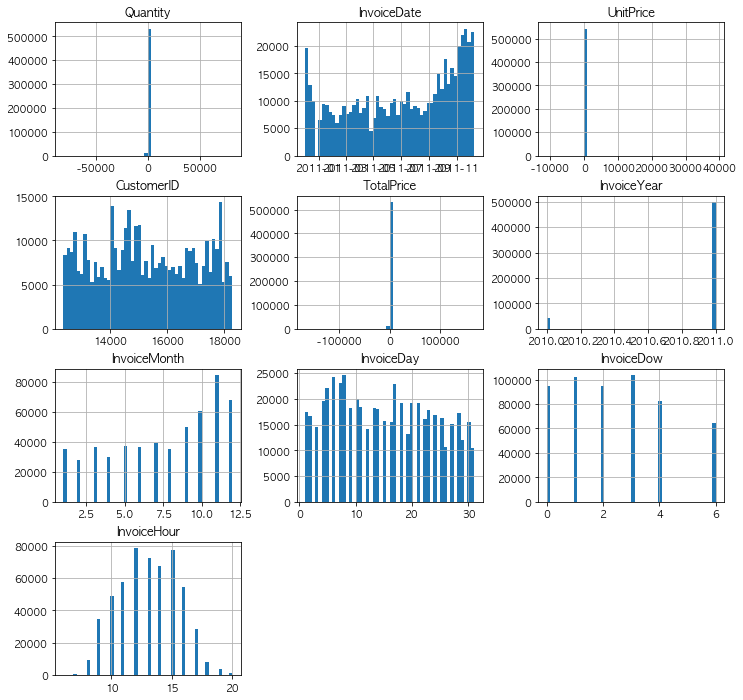

In [33]:
_ = df.hist(figsize=(12, 12), bins=50)

<AxesSubplot:xlabel='InvoiceYear', ylabel='count'>

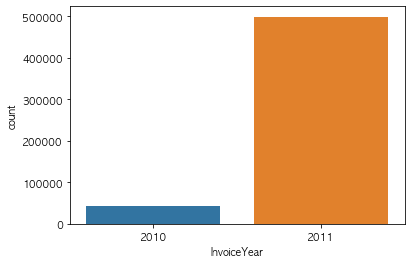

In [34]:
# countplot 으로 연도(InvoiceYear)별 구매 빈도수 시각화합니다.
sns.countplot(data=df, x="InvoiceYear")

<AxesSubplot:xlabel='InvoiceMonth', ylabel='count'>

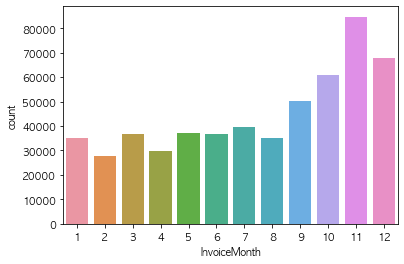

In [35]:
# countplot 으로 월(InvoiceMonth)별 구매 빈도수 시각화합니다.

sns.countplot(data=df, x="InvoiceMonth")

<AxesSubplot:xlabel='InvoiceYM', ylabel='count'>

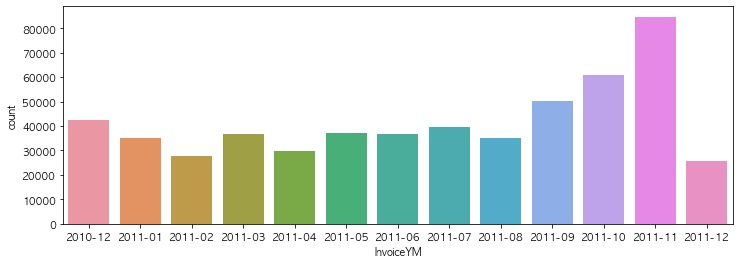

In [36]:
# countplot 으로 연도-월별(InvoiceYM) 구매 빈도수 시각화합니다.
plt.figure(figsize=(12, 4))

sns.countplot(data=df, x="InvoiceYM")

### 요일별 빈도수

<AxesSubplot:xlabel='InvoiceDow', ylabel='count'>

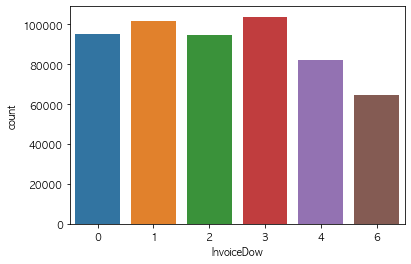

In [37]:
# countplot 으로 요일별( InvoiceDow ) 구매 빈도수 시각화합니다.

sns.countplot(data=df, x="InvoiceDow")

<AxesSubplot:xlabel='InvoiceDow', ylabel='count'>

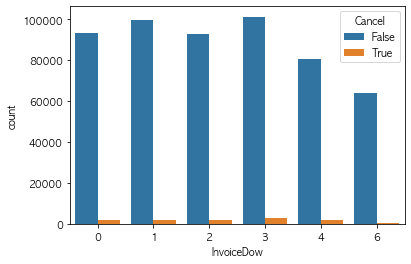

In [38]:
# countplot으로 요일별( InvoiceDow ) 구매와 취소 빈도수 시각화합니다.
# hue 옵션을 사용하면 특정 컬럼을 지정해서 표기할 수 있습니다.
# hue="Cancel" 로 취소여부도 함께 봅니다.

sns.countplot(data=df, x="InvoiceDow", hue="Cancel")

<AxesSubplot:title={'center':'요일 별 구매 취소'}, xlabel='InvoiceDow', ylabel='count'>

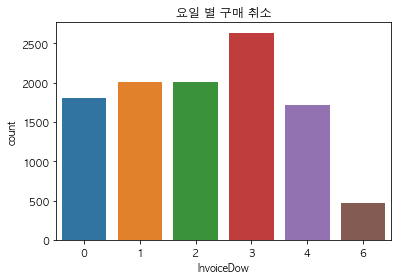

In [39]:
# countplot으로 요일별( InvoiceDow ) 구매 **취소** 빈도수 시각화합니다.
# df["Cancel"] == True 인 데이터로 구매 취소된 값만 추출합니다.
plt.title("요일 별 구매 취소")
sns.countplot(data=df[df["Cancel"]], x="InvoiceDow")

In [40]:
# 리스트컴프리헨션(List comprehension)을 통해 "월~일"요일 문자열을 리스트로 만듭니다.
# 리스트컴프리헨션(List comprehension)은 리스트 내부에서 반복문을 작성하여 반복하는 형식입니다.
# "월화수목금토일" 을 ['월', '화', '수', '목', '금', '토', '일'] 로 만듭니다.
day_name =  [w for w in "월화수목금토일"]
day_name

['월', '화', '수', '목', '금', '토', '일']

In [41]:
# 데이터를 보면 토요일이 없음
day_name.remove("토")
day_name

['월', '화', '수', '목', '금', '일']

In [42]:
# value_counts()로 요일별( InvoiceDow ) 구매 빈도수를 구합니다.
dow_count = df["InvoiceDow"].value_counts().sort_index()
dow_count.index = day_name
dow_count

월     95111
화    101808
수     94565
목    103857
금     82193
일     64375
Name: InvoiceDow, dtype: int64

<AxesSubplot:xlabel='InvoiceHour', ylabel='count'>

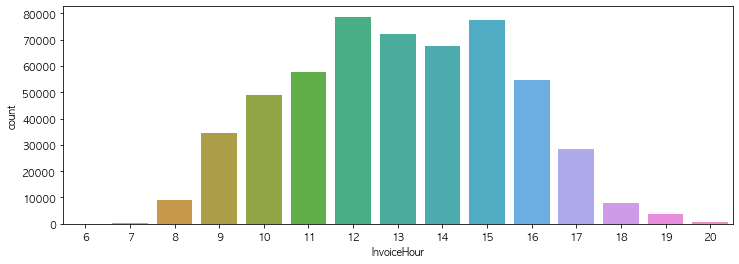

In [43]:
# countplot으로 시간대( InvoiceHour ) 구매 빈도수를 시각화합니다.
plt.figure(figsize=(12, 4))
sns.countplot(data=df, x="InvoiceHour")

<AxesSubplot:xlabel='InvoiceHour', ylabel='TotalPrice'>

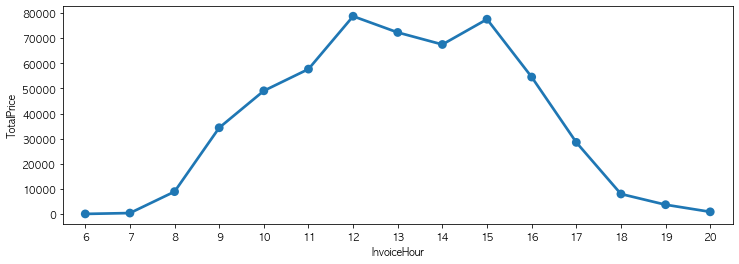

In [44]:
# pointplot 으로 시간대( InvoiceHour ) 구매 빈도수를 시각화합니다.
plt.figure(figsize=(12, 4))
sns.pointplot(data=df, x="InvoiceHour", y="TotalPrice", estimator=len, ci=None)

<AxesSubplot:ylabel='InvoiceHour'>

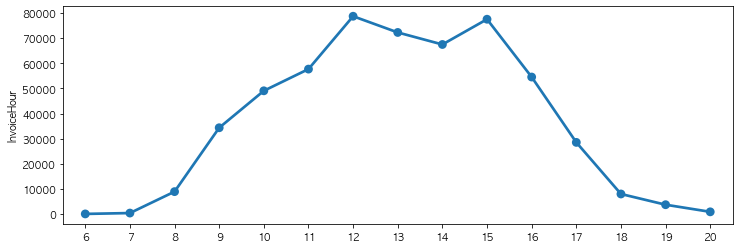

In [45]:
hour_count = df["InvoiceHour"].value_counts().sort_index()
plt.figure(figsize=(12, 4))
sns.pointplot(x=hour_count.index, y=hour_count)

## 시간-요일별 빈도수

In [46]:
# 시간별( InvoiceHour ), 요일별( InvoiceDow )로 crosstab 을 통해 구매 빈도수 구합니다.
hour_dow = pd.crosstab(df["InvoiceHour"], df["InvoiceDow"])
hour_dow

InvoiceDow,0,1,2,3,4,6
InvoiceHour,,,,,,
6,0,0,0,41,0,0
7,61,65,59,64,134,0
8,1641,1751,1826,1834,1857,0
9,7497,6440,5186,8060,7119,30
10,8872,9125,7904,9321,10215,3600
11,8926,10052,9973,8369,9589,10765
12,11801,14327,14527,13485,10942,13627
13,12756,12619,11901,12428,10488,12067
14,11502,11656,11006,11518,11737,10052


In [47]:
print(plt.colormaps())

['magma', 'inferno', 'plasma', 'viridis', 'cividis', 'twilight', 'twilight_shifted', 'turbo', 'Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges', 'PRGn', 'PiYG', 'PuBu', 'PuBuGn', 'PuOr', 'PuRd', 'Purples', 'RdBu', 'RdGy', 'RdPu', 'RdYlBu', 'RdYlGn', 'Reds', 'Spectral', 'Wistia', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd', 'afmhot', 'autumn', 'binary', 'bone', 'brg', 'bwr', 'cool', 'coolwarm', 'copper', 'cubehelix', 'flag', 'gist_earth', 'gist_gray', 'gist_heat', 'gist_ncar', 'gist_rainbow', 'gist_stern', 'gist_yarg', 'gnuplot', 'gnuplot2', 'gray', 'hot', 'hsv', 'jet', 'nipy_spectral', 'ocean', 'pink', 'prism', 'rainbow', 'seismic', 'spring', 'summer', 'terrain', 'winter', 'Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c', 'magma_r', 'inferno_r', 'plasma_r', 'viridis_r', 'cividis_r', 'twilight_r', 'twilight_shifted_r', 'turbo_r', 'Blues_r', 'BrBG_r', 'BuGn_r', 'BuPu_r', 'CMRmap_r', 'GnBu_r', 'G

In [48]:
# 리스트컴프리헨션(List comprehension)을 통해 토요일을 제외한 
# "월화수목금일"요일 문자열을 리스트를 컬럼명으로 대체합니다.
# 위에서 구한 값을 .style.background_gradient() 통해서 시각화합니다.
hour_dow.columns = day_name
hour_dow.style.background_gradient(cmap="Oranges")

,월,화,수,목,금,일
InvoiceHour,,,,,,
6,0,0,0,41,0,0
7,61,65,59,64,134,0
8,1641,1751,1826,1834,1857,0
9,7497,6440,5186,8060,7119,30
10,8872,9125,7904,9321,10215,3600
11,8926,10052,9973,8369,9589,10765
12,11801,14327,14527,13485,10942,13627
13,12756,12619,11901,12428,10488,12067
14,11502,11656,11006,11518,11737,10052


<AxesSubplot:xlabel='InvoiceHour'>

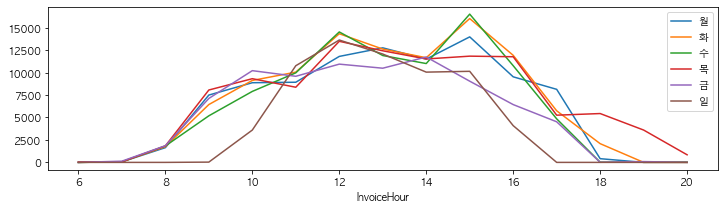

In [49]:
# 시간별_요열별 구매 주문 시각화
hour_dow.plot(figsize=(12, 3))

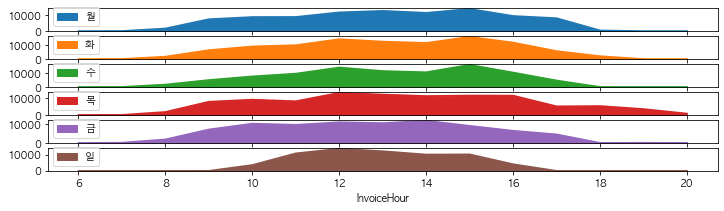

In [50]:
# 시간별_요열별 구매 주문 subplot을 통해 요일별 시각화

_ = hour_dow.plot.area(figsize=(12, 3), subplots=True)

<AxesSubplot:ylabel='InvoiceHour'>

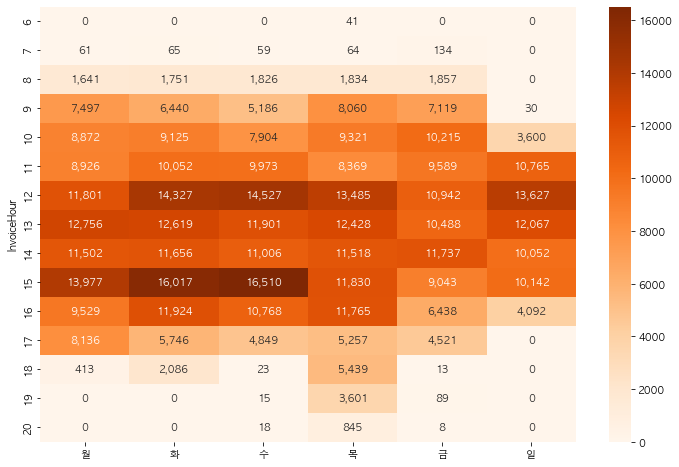

In [51]:
# 시간별_요열별 구매 주문을 heatmap을 통해 구매 빈도수를 시각화
plt.figure(figsize=(12, 8))
sns.heatmap(hour_dow, annot=True, cmap="Oranges", fmt=",.0f")

### 시간대 빈도수

## 고객ID가 없는 주문과 취소 주문은 전체 데이터에서 제외

* 취소와 취소에 대한 본 주문건 제거
* 고객ID가 없는 건도 제거

In [52]:
df.describe()

,Quantity,UnitPrice,CustomerID,TotalPrice,InvoiceYear,InvoiceMonth,InvoiceDay,InvoiceDow,InvoiceHour
count,541909.000000,541909.000000,406829.000000,541909.000000,541909.000000,541909.000000,541909.000000,541909.000000,541909.000000
mean,9.552250,4.611114,15287.690570,17.987795,2010.921609,7.553128,15.023096,2.431277,13.078729
std,218.081158,96.759853,1713.600303,378.810824,0.268787,3.509055,8.664063,1.844709,2.443270
min,-80995.000000,-11062.060000,12346.000000,-168469.600000,2010.000000,1.000000,1.000000,0.000000,6.000000
25%,1.000000,1.250000,13953.000000,3.400000,2011.000000,5.000000,7.000000,1.000000,11.000000
50%,3.000000,2.080000,15152.000000,9.750000,2011.000000,8.000000,15.000000,2.000000,13.000000
75%,10.000000,4.130000,16791.000000,17.400000,2011.000000,11.000000,22.000000,4.000000,15.000000
max,80995.000000,38970.000000,18287.000000,168469.600000,2011.000000,12.000000,31.000000,6.000000,20.000000


In [53]:
# "CustomerID" 가 있고(notnull) "Quantity", "UnitPrice" 가 0보다 큰 데이터를 가져옵니다.
# 구매하고 취소한 건 중 취소한 건만 제외하고 구매 건은 남깁니다.
# 유효한 데이터를 df_valid 변수에 할당합니다.
# df_valid

df_valid = df[df["CustomerID"].notnull() & (df["Quantity"] > 0) & (df["UnitPrice"] > 0)].copy()
df.shape, df_valid.shape

((541909, 17), (397884, 17))

In [54]:
# 고객ID가 없는 건도 제거하여 df_valid 변수에 할당합니다.
# 중복 데이터 제거
df_valid = df_valid.drop_duplicates().copy()
df_valid.shape

(392692, 17)

## 고객
* ARPU(Average Revenue Per User) : 
    * 가입한 서비스에 대해 가입자 1명이 특정 기간 동안 지출한 평균 금액
    * ARPU = 매출 / 중복을 제외한 순수 활동 사용자 수
* ARPPU(Average Revenue Per Paying User):
    * 지불 유저 1명 당 한 달에 결제하는 평균 금액을 산정한 수치
    

* [ARPU - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/ARPU)
* [ARPPU](https://terms.naver.com/entry.naver?docId=2028542&cid=42914&categoryId=42915)

In [55]:
# ARPPU
arppu = df.groupby("InvoiceYM").agg({"TotalPrice":"sum", "CustomerID": "nunique"})
arppu["ARPPU"] = arppu["TotalPrice"] / arppu["CustomerID"]
arppu.head(2)

,TotalPrice,CustomerID,ARPPU
InvoiceYM,,,
2010-12,748957.02,948,790.039051
2011-01,560000.26,783,715.198289


<AxesSubplot:xlabel='InvoiceYM'>

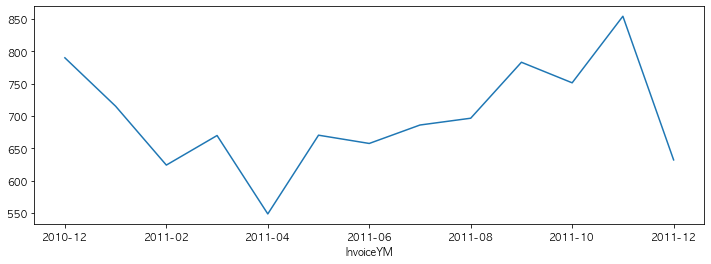

In [56]:
arppu["ARPPU"].plot(figsize=(12, 4))

In [57]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'TotalPrice', 'Cancel',
       'InvoiceYear', 'InvoiceMonth', 'InvoiceDay', 'InvoiceDow', 'InvoiceYM',
       'InvoiceTime', 'InvoiceHour'],
      dtype='object')

In [58]:
# df_valid(유효고객, 유효주문)내 고객별( CustomerID ) 구매( InvoiceNo ) 빈도수를 구합니다.
# 고객별 구매 빈도수, 평균 구매 금액, 총 구매금액
cust_agg = df_valid.groupby("CustomerID")["TotalPrice"].agg(["count", "mean", "sum"])
cust_agg.head(2)

,count,mean,sum
CustomerID,,,
12346.0,1,77183.600000,77183.6
12347.0,182,23.681319,4310.0


In [59]:
df_valid.groupby("CustomerID").agg({"TotalPrice": ["count", "mean"], "InvoiceNo": "count"})

TotalPrice               InvoiceNo
                count          mean     count
CustomerID                                   
12346.0             1  77183.600000         1
12347.0           182     23.681319       182
12348.0            31     57.975484        31
12349.0            73     24.076027        73
12350.0            17     19.670588        17
...               ...           ...       ...
18280.0            10     18.060000        10
18281.0             7     11.545714         7
18282.0            12     14.837500        12
18283.0           721      2.837074       721
18287.0            70     26.246857        70

[4338 rows x 3 columns]

In [60]:
# 고객별(CustomerID) 기술통계 값을 확인합니다.
cust_agg.describe()

,count,mean,sum
count,4338.000000,4338.000000,4338.000000
mean,90.523744,68.381590,2048.688081
std,225.506968,1467.918294,8985.230220
min,1.000000,2.136970,3.750000
25%,17.000000,12.393196,306.482500
50%,41.000000,17.755000,668.570000
75%,98.000000,24.878950,1660.597500
max,7676.000000,77183.600000,280206.020000


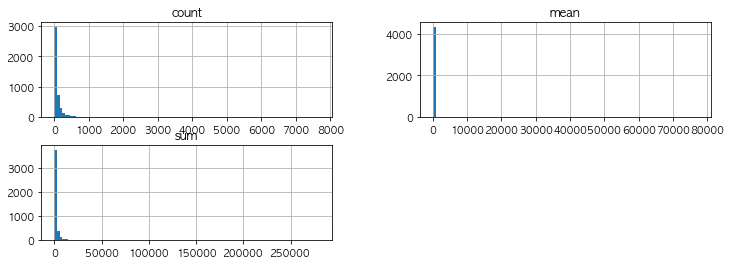

In [61]:
_ = cust_agg.hist(bins=100, figsize=(12, 4))

## MAU(Monthly Active User)

<AxesSubplot:xlabel='InvoiceYM'>

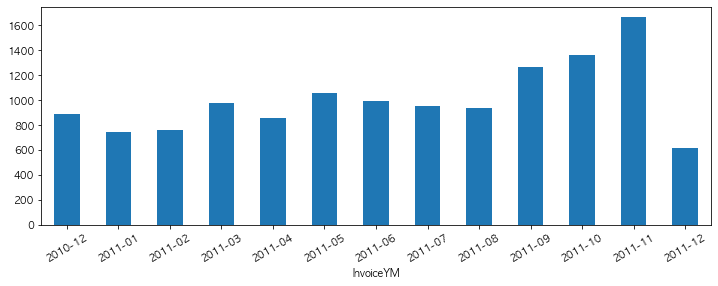

In [62]:
# InvoiceYM 으로 그룹화 하여 CustomerID 의 유일값의 갯수를 구합니다.
df_valid.groupby("InvoiceYM")["CustomerID"].nunique().plot.bar(rot=30, figsize=(12, 4))

## 월별, 주문건, 중복을 제외한 주문제품 종류 수, 고객 수, 총 주문금액

In [63]:
# df_valid(유효고객, 유효주문)에 대해 월별 데이터(InvoiceYM)를 확인합니다.
# InvoiceNo 의 수
# StockCode, CustomerID 의 유일값의 수
# UnitPrice, Quantity, TotalPrice 의 sum
df.groupby("InvoiceYM").agg({"InvoiceNo" : "count", 
                             "StockCode": "nunique",
                             "CustomerID": "nunique",
                             "UnitPrice" : "sum",
                             "Quantity" : "sum",
                             "TotalPrice" : "sum"
                            })

,InvoiceNo,StockCode,CustomerID,UnitPrice,Quantity,TotalPrice
InvoiceYM,,,,,,
2010-12,42481,2822,948,260520.850,342228,748957.020
2011-01,35147,2645,783,172752.800,308966,560000.260
2011-02,27707,2431,798,127448.770,277989,498062.650
2011-03,36748,2562,1020,171486.510,351872,683267.080
2011-04,29916,2558,899,129164.961,289098,493207.121
2011-05,37030,2505,1079,190685.460,380391,723333.510
2011-06,36874,2672,1051,200717.340,341623,691123.120
2011-07,39518,2748,993,171906.791,391116,681300.111
2011-08,35284,2614,980,150385.680,406199,682680.510


## 월단위 데이터 전처리

In [64]:
# get_month_day1() 함수를 통해 " 연도-월-1 " 형식으로 만듭니다.
# 일자를 " 1 "로 통일화한 이유는 월별 잔존률을 구하기 위해서 입니다.(월 단위)
def get_month_day1(x):
    return dt.datetime(x.year, x.month, 1)

In [65]:
# map() 함수를 통해 get_month_day1() 함수를 df_valid(유효고객, 유효주문)에 일괄 적용합니다.
# " 연도-월-1 "로 표기가 통일된 InvoiceDate1 이라는 파생변수를 생성합니다.
df_valid["InvoiceDate1"] = df_valid["InvoiceDate"].map(get_month_day1)

In [66]:
# df_valid["InvoiceDate1"] = pd.to_datetime(df_valid["InvoiceYM"])

In [67]:
# df_valid["InvoiceDate1"]을 구합니다.

df_valid[["InvoiceDate", "InvoiceDate1"]].sample(5)

,InvoiceDate,InvoiceDate1
379147,2011-10-05 14:03:00,2011-10-01
377806,2011-10-05 09:56:00,2011-10-01
178812,2011-05-06 16:54:00,2011-05-01
510769,2011-11-29 15:06:00,2011-11-01
489855,2011-11-22 13:30:00,2011-11-01


In [68]:
df_valid.shape

(392692, 18)

In [69]:
df_valid.groupby(["CustomerID"]).min().shape

(4338, 17)

In [70]:
# 최초 구매일( InvoiceDateMin )에 InvoiceDate1의 최솟값을 구하여 할당합니다.
# 일자가 "1 로 통일되어 있어 " 최근 구매일 - 최초 구매일 "로 첫 구매 후 몇달 후 구매인지를 알 수 있습니다.
df_valid["InvoiceDateMin"] = df_valid.groupby(
    ["CustomerID"])["InvoiceDate1"].transform("min")

In [71]:
df_valid[["CustomerID", "InvoiceDate", "InvoiceDateMin", "InvoiceDate1"]].sample(5)

,CustomerID,InvoiceDate,InvoiceDateMin,InvoiceDate1
53264,17569.0,2011-01-11 14:15:00,2011-01-01,2011-01-01
397753,17677.0,2011-10-14 12:33:00,2010-12-01,2011-10-01
78155,13939.0,2011-02-01 11:30:00,2011-02-01,2011-02-01
181237,16477.0,2011-05-09 14:40:00,2010-12-01,2011-05-01
177529,17841.0,2011-05-06 11:36:00,2010-12-01,2011-05-01


### 첫 구매월로 부터 몇 달째 구매인가?

In [72]:
# 연도별 차이( year_diff )와 월별 차이( month_diff )를 구합니다.

year_diff = df_valid["InvoiceDate1"].dt.year - df_valid["InvoiceDateMin"].dt.year
month_diff = df_valid["InvoiceDate1"].dt.month - df_valid["InvoiceDateMin"].dt.month

In [73]:
# " 연도차이 * 12개월 + 월차이 + 1 "로 첫 구매 후 몇달 후 구매인지 알 수 있도록 CohortIndex 변수를 생성합니다.
# 2010-12-01부터 2011-12-01의 데이터를 기반으로 진행되어 CohortIndex 변수의 최소값은 1이며, 최대값 13입니다.
df_valid["CohortIndex"] = (year_diff * 12) + month_diff + 1
df_valid.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Cancel,InvoiceYear,InvoiceMonth,InvoiceDay,InvoiceDow,InvoiceYM,InvoiceTime,InvoiceHour,InvoiceDate1,InvoiceDateMin,CohortIndex
335322,566281,23236,STORAGE TIN VINTAGE DOILY,6,2011-09-11 14:15:00,2.89,12748.0,United Kingdom,17.34,False,2011,9,11,6,2011-09,14:15:00,14,2011-09-01,2010-12-01,10
79812,543006,21974,SET OF 36 PAISLEY FLOWER DOILIES,1,2011-02-02 12:53:00,1.45,17975.0,United Kingdom,1.45,False,2011,2,2,2,2011-02,12:53:00,12,2011-02-01,2010-12-01,3
386822,570247,23316,RED REFECTORY CLOCK,2,2011-10-10 08:23:00,9.95,15193.0,United Kingdom,19.90,False,2011,10,10,0,2011-10,08:23:00,8,2011-10-01,2011-10-01,1
266993,560278,23300,GARDENERS KNEELING PAD CUP OF TEA,1,2011-07-17 15:45:00,1.65,13610.0,United Kingdom,1.65,False,2011,7,17,6,2011-07,15:45:00,15,2011-07-01,2011-02-01,6
416240,572552,22398,MAGNETS PACK OF 4 SWALLOWS,1,2011-10-24 17:07:00,2.46,14096.0,United Kingdom,2.46,False,2011,10,24,0,2011-10,17:07:00,17,2011-10-01,2011-08-01,3


### 코호트 월별 빈도수

<AxesSubplot:>

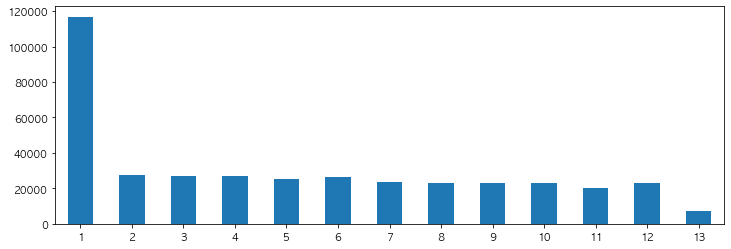

In [74]:
# CohortIndex 값으로 월별 잔존 구매에 대한 빈도수를 구합니다.
# 회원가입 후 월별 구매 빈도수를 value_counts 로 구합니다.
df_valid["CohortIndex"].value_counts().sort_index().plot.bar(figsize=(12, 4), rot=0)

<AxesSubplot:xlabel='CohortIndex', ylabel='count'>

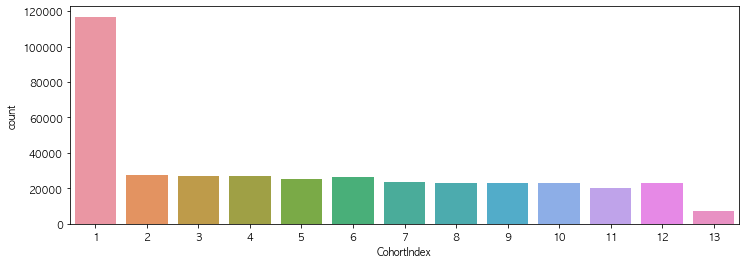

In [75]:
# countplot 으로 CohortIndex 의 빈도수를 시각화합니다.
plt.figure(figsize=(12, 4))
sns.countplot(data=df_valid, x="CohortIndex")

## 잔존 빈도 구하기

In [76]:
df_valid.groupby(["InvoiceDateMin", "CohortIndex"])["CustomerID"].nunique()

InvoiceDateMin  CohortIndex
2010-12-01      1              885
                2              324
                3              286
                4              340
                5              321
                              ... 
2011-10-01      2               86
                3               41
2011-11-01      1              323
                2               36
2011-12-01      1               41
Name: CustomerID, Length: 91, dtype: int64

In [77]:
# InvoiceDateMin, CohortIndex 로 그룹화 하여 CustomerID 의 유일값에 대한 빈도수를 구합니다.
cohort_count = df_valid.groupby(["InvoiceDateMin", "CohortIndex"])["CustomerID"].nunique().unstack()
cohort_count

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
InvoiceDateMin,,,,,,,,,,,,,
2010-12-01,885.0,324.0,286.0,340.0,321.0,352.0,321.0,309.0,313.0,350.0,331.0,445.0,235.0
2011-01-01,417.0,92.0,111.0,96.0,134.0,120.0,103.0,101.0,125.0,136.0,152.0,49.0,NaN
2011-02-01,380.0,71.0,71.0,108.0,103.0,94.0,96.0,106.0,94.0,116.0,26.0,NaN,NaN
2011-03-01,452.0,68.0,114.0,90.0,101.0,76.0,121.0,104.0,126.0,39.0,NaN,NaN,NaN
2011-04-01,300.0,64.0,61.0,63.0,59.0,68.0,65.0,78.0,22.0,NaN,NaN,NaN,NaN
2011-05-01,284.0,54.0,49.0,49.0,59.0,66.0,75.0,27.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,242.0,42.0,38.0,64.0,56.0,81.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,188.0,34.0,39.0,42.0,51.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,169.0,35.0,42.0,41.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='CohortIndex', ylabel='InvoiceDateMin'>

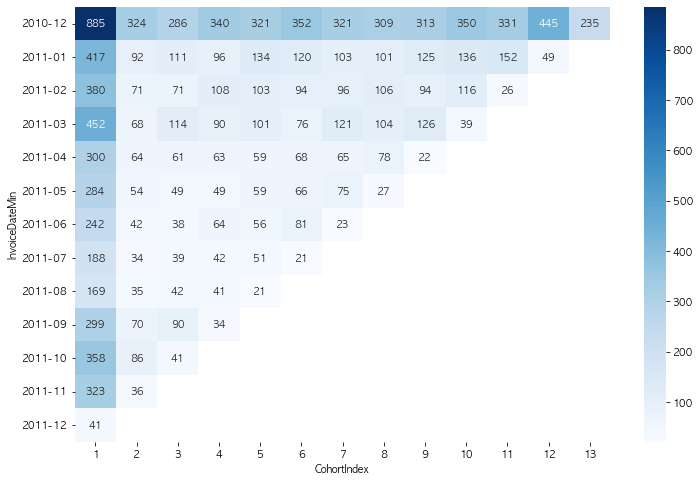

In [78]:
# heatmap을 통해 위에서 구한 잔존수을 시각화 합니다.
plt.figure(figsize=(12, 8))
cohort_count.index = cohort_count.index.astype(str).str[:7]
sns.heatmap(cohort_count, annot=True, cmap="Blues", fmt=".0f")

### 월별 신규 유입 고객 수 
* Acqusition, Activation

In [79]:
cohort_count[1]

InvoiceDateMin
2010-12    885.0
2011-01    417.0
2011-02    380.0
2011-03    452.0
2011-04    300.0
2011-05    284.0
2011-06    242.0
2011-07    188.0
2011-08    169.0
2011-09    299.0
2011-10    358.0
2011-11    323.0
2011-12     41.0
Name: 1, dtype: float64

<AxesSubplot:title={'center':'Acqusition, Activation'}, xlabel='InvoiceDateMin'>

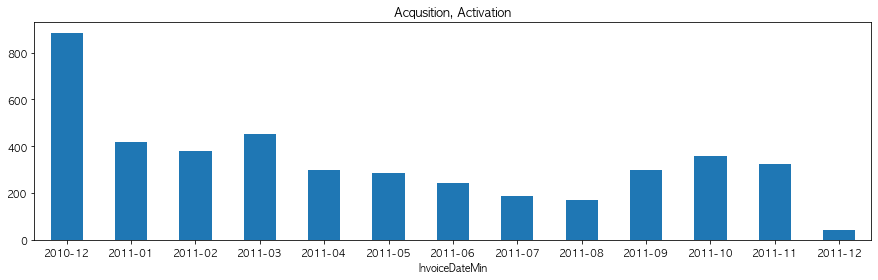

In [80]:
cohort_count[1].plot.bar(figsize=(15, 4), rot=0, title="Acqusition, Activation")

## 잔존율 구하기

In [81]:
# 가입한 달을 1로 나누면 잔존률을 구할 수 있습니다.
# div 를 통해 구하며 axis=0 으로 설정하면 첫 달을 기준으로 나머지 달을 나누게 됩니다.

cohort_ratio = cohort_count.div(cohort_count[1], axis=0)
cohort_ratio

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
InvoiceDateMin,,,,,,,,,,,,,
2010-12,1.0,0.366102,0.323164,0.384181,0.362712,0.397740,0.362712,0.349153,0.353672,0.395480,0.374011,0.502825,0.265537
2011-01,1.0,0.220624,0.266187,0.230216,0.321343,0.287770,0.247002,0.242206,0.299760,0.326139,0.364508,0.117506,NaN
2011-02,1.0,0.186842,0.186842,0.284211,0.271053,0.247368,0.252632,0.278947,0.247368,0.305263,0.068421,NaN,NaN
2011-03,1.0,0.150442,0.252212,0.199115,0.223451,0.168142,0.267699,0.230088,0.278761,0.086283,NaN,NaN,NaN
2011-04,1.0,0.213333,0.203333,0.210000,0.196667,0.226667,0.216667,0.260000,0.073333,NaN,NaN,NaN,NaN
2011-05,1.0,0.190141,0.172535,0.172535,0.207746,0.232394,0.264085,0.095070,NaN,NaN,NaN,NaN,NaN
2011-06,1.0,0.173554,0.157025,0.264463,0.231405,0.334711,0.095041,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,1.0,0.180851,0.207447,0.223404,0.271277,0.111702,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,1.0,0.207101,0.248521,0.242604,0.124260,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='CohortIndex', ylabel='InvoiceDateMin'>

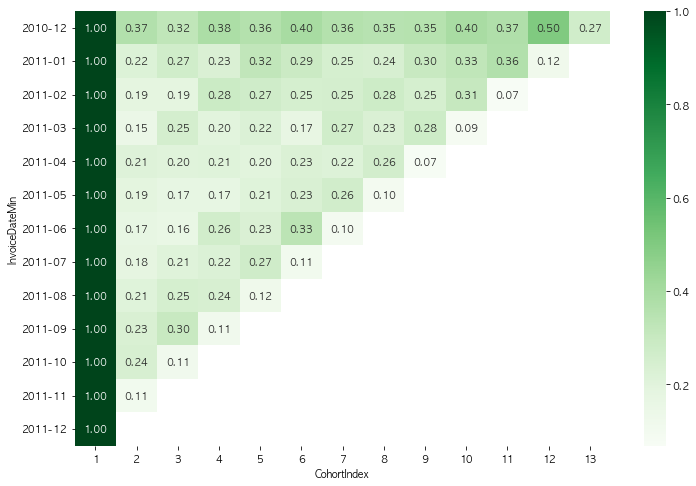

In [82]:
# heatmap을 통해 위에서 구한 잔존율을 시각화 합니다.
plt.figure(figsize=(12, 8))
sns.heatmap(cohort_ratio, annot=True, fmt=".2f", cmap="Greens")

## 고객별 매출액

In [83]:
df_valid.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'TotalPrice', 'Cancel',
       'InvoiceYear', 'InvoiceMonth', 'InvoiceDay', 'InvoiceDow', 'InvoiceYM',
       'InvoiceTime', 'InvoiceHour', 'InvoiceDate1', 'InvoiceDateMin',
       'CohortIndex'],
      dtype='object')

In [84]:
sale_sum = df_valid.groupby(["InvoiceDateMin", "CohortIndex"])["TotalPrice"].sum().unstack()
sale_sum

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
InvoiceDateMin,,,,,,,,,,,,,
2010-12-01,570422.730,275734.47,233390.47,302367.44,204034.38,336113.69,313668.16,310304.03,331001.070,471792.13,455478.90,512341.08,185360.97
2011-01-01,292366.840,54993.86,63157.01,71526.09,80989.77,84464.57,70073.35,72503.42,71870.481,111370.70,123252.86,26388.03,NaN
2011-02-01,157700.590,28937.64,40964.47,48155.39,40089.17,34155.67,49673.71,62292.80,55241.340,64688.86,10600.22,NaN,NaN
2011-03-01,199619.670,30040.34,58958.41,42739.08,51392.44,39962.33,64824.15,70523.62,70847.620,12761.10,NaN,NaN,NaN
2011-04-01,121809.051,29398.59,25028.57,24282.79,26253.16,30103.24,28505.90,34009.61,6332.000,NaN,NaN,NaN,NaN
2011-05-01,123739.300,18641.70,20155.73,19162.17,27752.62,32875.34,33168.34,179184.23,NaN,NaN,NaN,NaN,NaN
2011-06-01,135414.800,14738.49,14104.37,30898.56,26669.90,42531.09,8143.22,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,73860.401,11789.67,15488.37,17391.93,19156.82,6040.70,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,79601.140,20933.76,35458.48,44487.65,15284.36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [85]:
sale_ratio = sale_sum.div(sale_sum[1], axis=0)
sale_ratio

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
InvoiceDateMin,,,,,,,,,,,,,
2010-12-01,1.0,0.483386,0.409154,0.530076,0.357690,0.589236,0.549887,0.543990,0.580273,0.827092,0.798494,0.898178,0.324954
2011-01-01,1.0,0.188099,0.216020,0.244645,0.277014,0.288899,0.239676,0.247988,0.245823,0.380928,0.421569,0.090257,NaN
2011-02-01,1.0,0.183497,0.259761,0.305360,0.254211,0.216586,0.314987,0.395007,0.350293,0.410200,0.067217,NaN,NaN
2011-03-01,1.0,0.150488,0.295354,0.214103,0.257452,0.200192,0.324738,0.353290,0.354913,0.063927,NaN,NaN,NaN
2011-04-01,1.0,0.241350,0.205474,0.199351,0.215527,0.247135,0.234021,0.279204,0.051983,NaN,NaN,NaN,NaN
2011-05-01,1.0,0.150653,0.162889,0.154859,0.224283,0.265682,0.268050,1.448079,NaN,NaN,NaN,NaN,NaN
2011-06-01,1.0,0.108840,0.104157,0.228177,0.196950,0.314080,0.060135,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,1.0,0.159621,0.209698,0.235470,0.259365,0.081785,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,1.0,0.262983,0.445452,0.558882,0.192012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='CohortIndex', ylabel='InvoiceDateMin'>

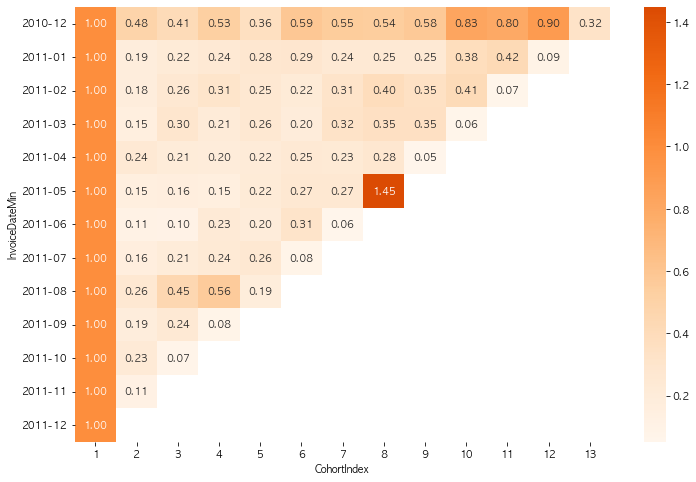

In [86]:
plt.figure(figsize=(12, 8)) 
sale_ratio.index = sale_ratio.index.astype(str).str[:7]
sns.heatmap(sale_ratio, annot=True, fmt=".2f", cmap="Oranges", center=1)